# Assignment - 4, authored by KARTHIKEYAN R
# 1. Download the dataset from [here](https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification/data).
**About the dataset**
* Label - Ham or Spam
* Message - Message 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 2. Importing Required Library

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

# 3. Read dataset and do Preprocessing

In [3]:
df = pd.read_csv("SMSSpamCollection.csv",names=['label','message'])

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(-0.5, 1599.5, 799.5, -0.5)

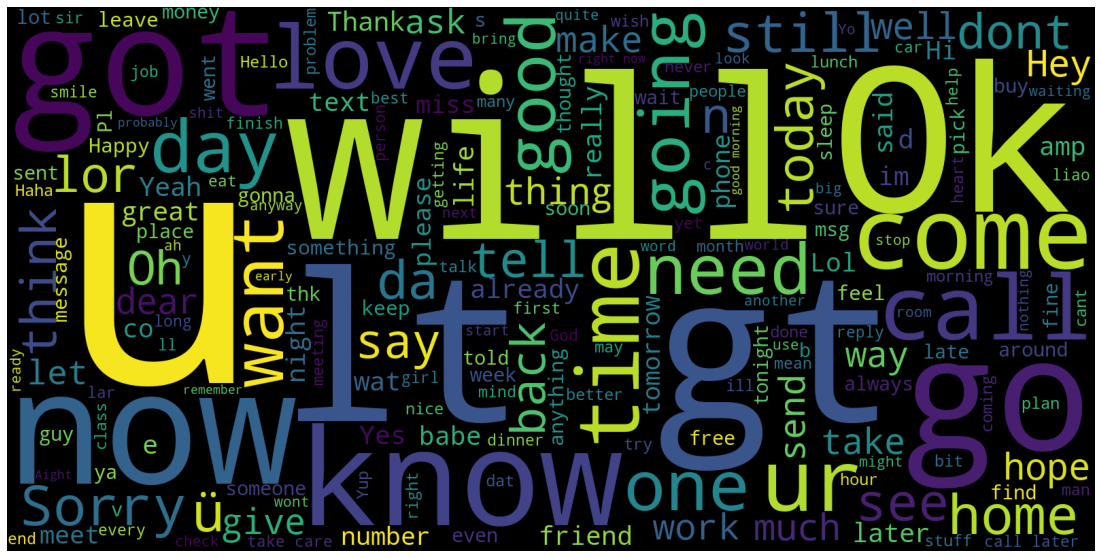

In [7]:
ms1 = pd.Series((df.loc[df['label']=='ham','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms1))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

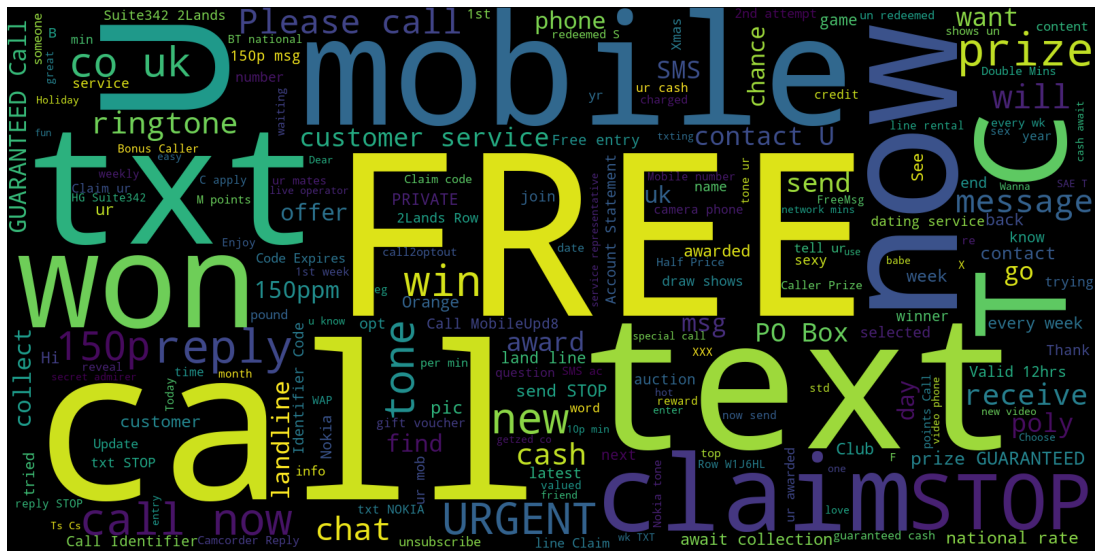

In [8]:
ms2 = pd.Series((df.loc[df['label']=='spam','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms2))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [9]:
lemmatizer = WordNetLemmatizer()
corpus = []

In [10]:
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# 4. Create Model

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense,Dropout,LSTM,Embedding
from keras.models import Sequential,load_model

In [12]:
token = Tokenizer()
token.fit_on_texts(corpus)
text_to_seq = token.texts_to_sequences(corpus)

In [13]:
max_length_sequence = max([len(i) for i in text_to_seq])
padded_seq = pad_sequences(text_to_seq, maxlen=max_length_sequence, padding="pre")

In [14]:
padded_seq

array([[   0,    0,    0, ...,   16, 3572,   72],
       [   0,    0,    0, ...,  359,    1, 1622],
       [   0,    0,    0, ...,  221,   29,  297],
       ...,
       [   0,    0,    0, ..., 7119, 1101, 3568],
       [   0,    0,    0, ...,  852,    1,   10],
       [   0,    0,    0, ..., 2204,  332,  154]])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(padded_seq,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(4179, 77)

# 5. Add Layers

In [18]:
TOT_SIZE = len(token.word_index) + 1
model = Sequential()
#IP Layer
model.add(Embedding(TOT_SIZE,32,input_length=max_length_sequence))
model.add(LSTM(units=50, activation = 'relu',return_sequences=True))
model.add(Dropout(0.2))
#Layer2
model.add(LSTM(units=60, activation = 'relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 32)            227872    
                                                                 
 lstm (LSTM)                 (None, 77, 50)            16600     
                                                                 
 dropout (Dropout)           (None, 77, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                26640     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 271,173
Trainable params: 271,173
Non-trai

# 6,7 Compile and Fit the model

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
131/131 [==============================] - 26s 148ms/step - loss: 0.7357 - accuracy: 0.8643 - val_loss: 0.2063 - val_accuracy: 0.8665
Epoch 2/10
131/131 [==============================] - 19s 145ms/step - loss: 0.1576 - accuracy: 0.9691 - val_loss: 36236.3438 - val_accuracy: 0.9856
Epoch 3/10
131/131 [==============================] - 16s 122ms/step - loss: 16435255.0000 - accuracy: 0.9864 - val_loss: 0.2386 - val_accuracy: 0.9907
Epoch 4/10
131/131 [==============================] - 19s 144ms/step - loss: 0.1788 - accuracy: 0.9935 - val_loss: 21.0637 - val_accuracy: 0.9892
Epoch 5/10
131/131 [==============================] - 16s 119ms/step - loss: 1.2619 - accuracy: 0.9945 - val_loss: 4.3433 - val_accuracy: 0.9892
Epoch 6/10
131/131 [==============================] - 15s 114ms/step - loss: 0.0952 - accuracy: 0.9947 - val_loss: 4.9345 - val_accuracy: 0.9899
Epoch 7/10
131/131 [==============================] - 15s 112ms/step - loss: 0.0582 - accuracy: 0.9959 - val_loss: 10.

In [22]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 2s 37ms/step - loss: 25.0567 - accuracy: 0.9828


[25.056659698486328, 0.9827709794044495]

# 8. Save the Model

In [23]:
from pickle import dump,load
tfid = 'tfid.sav'
lstm = 'lstm.sav'

In [24]:
dump(token,open(tfid,'wb'))
model.save('nlp.h5')

# 9. Test the Model

In [25]:
def preprocess(raw_mess):
    review = re.sub('[^a-zA-Z]',' ',raw_mess)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [26]:
def predict(mess):
    vect = load(open(tfid,'rb'))
    classifier = load_model('nlp.h5')
    clean = preprocess(mess)
    text_to_seq = token.texts_to_sequences([mess])
    padded_seq = pad_sequences(text_to_seq, maxlen=77, padding="pre")
    pred = classifier.predict(padded_seq)
    return pred

In [32]:
msg = input("Enter a message: ")
predi = predict(msg)
if predi >= 0.6:
    print("It is a spam")
else:
    print("Not a spam")

Enter a message: Hey hi how are you?
1/1 [==============================] - 1s 658ms/step
Not a spam


In [28]:
msg = input("Enter a message: ")
predi = predict(msg)
if predi >= 0.6:
    print("It is a spam")
else:
    print("Not a spam")

Enter a message: You won a cash reward of 3000rs!!!
1/1 [==============================] - 1s 552ms/step
It is a spam
